In [91]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [92]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [93]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [94]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [95]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bredasdorp za
porto novo cv
westport ie
rabo de peixe pt
grand river south east mu
lebu cl
tiksi ru
port alfred za
saleaula ws
kurush ru
rikitea pf
rikitea pf
narsaq gl
katsuura jp
ostrovnoy ru
awbari ly
nelson bay au
hobart au
punta arenas cl
jamestown sh
brownsville us
arman ru
tuktoyaktuk ca
rikitea pf
college us
barrow us
kyaikkami mm
namibe ao
albany au
zelenyy bor ru
busselton au
novo aripuana br
vaini to
fortuna us
vaini to
ishigaki jp
vila franca do campo pt
xai-xai mz
busselton au
aklavik ca
kismayo so
sarab ir
port elizabeth za
awbari ly
kapaa us
terpinnya ua
otradnoye ru
kangaatsiaq gl
rikitea pf
sur om
jamestown sh
muswellbrook au
rikitea pf
auxerre fr
mahebourg mu
pemangkat id
punta arenas cl
vaitupu wf
merauke id
sitka us
hermanus za
port alfred za
te anau nz
bethel us
albany au
dingle ie
saint-philippe re
toliary mg
hirara jp
leningradskiy ru
mataura pf
te anau nz
saint-philippe re
cape town za
taksimo ru
barrow us
inyonga tz
hilo us
vao nc
camacupa ao
husavik is
port al

In [96]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [97]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

import time

In [113]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [112]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [106]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Log": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

time.sleep(1)

174 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 175 of Set 4 | nioro
Processing Record 176 of Set 4 | plettenberg bay
Processing Record 177 of Set 4 | mitsamiouli
Processing Record 178 of Set 4 | ballina
Processing Record 179 of Set 4 | kaitangata
Processing Record 180 of Set 4 | mount isa
Processing Record 181 of Set 4 | upernavik
Processing Record 182 of Set 4 | nizhniy tsasuchey
Processing Record 183 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 184 of Set 4 | saskylakh
Processing Record 185 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 186 of Set 4 | avera
Processing Record 187 of Set 4 | sisimiut
Processing Record 188 of Set 4 | kant
Processing Record 189 of Set 4 | kiruna
Processing Record 190 of Set 4 | skibbereen
Processing Record 191 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 192 of Set 4 | san rafael
Processing Record 193 of Set 4 | ibicui
Processing Record 194 of Set 4 | bayburt
Process

In [107]:
len(city_data)

570

In [108]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Log,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,60.12,63,100,9.37,ZA,2021-05-28 01:43:12
1,Porto Novo,6.4965,2.6036,79.54,86,100,5.19,BJ,2021-05-28 01:43:13
2,Westport,41.1415,-73.3579,73.38,52,1,1.01,US,2021-05-28 01:43:13
3,Rabo De Peixe,37.8000,-25.5833,56.71,77,20,5.73,PT,2021-05-28 01:43:13
4,Lebu,-37.6167,-73.6500,54.10,84,66,11.65,CL,2021-05-28 01:43:14
5,Tiksi,71.6872,128.8694,36.19,88,100,5.44,RU,2021-05-28 01:43:14
6,Port Alfred,-33.5906,26.8910,59.18,77,12,8.75,ZA,2021-05-28 01:42:18
7,Kurush,41.2841,47.8345,35.49,79,29,6.80,RU,2021-05-28 01:43:15
8,Rikitea,-23.1203,-134.9692,71.15,58,32,4.65,PF,2021-05-28 01:42:20
9,Narsaq,60.9167,-46.0500,52.02,64,67,6.06,GL,2021-05-28 01:43:15


In [116]:
new_column_order = ['City', 'Country', 'Date', 'Lat','Log', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [117]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [118]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

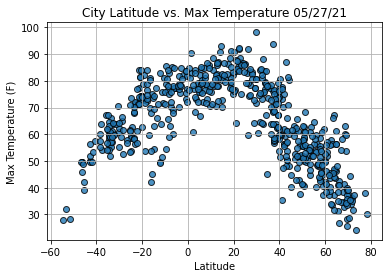

In [119]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

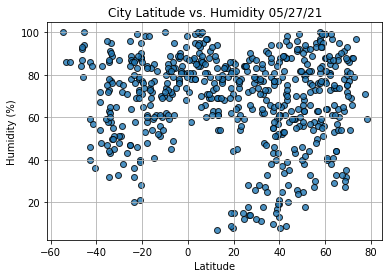

In [120]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

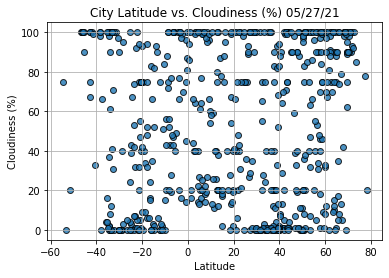

In [121]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()